<div style = "text-align:center">

# EDA Com pandas
</div>



In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



# Análise Descritiva 

In [2]:
# Carregar o dataset
df = pd.read_csv("carros_usados.csv", sep=';')

# Verificar o número de linhas e colunas
print("Número de linhas e colunas:", df.shape , "\n")

pd.DataFrame(df)

Número de linhas e colunas: (7495, 13) 



,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,TRAIN,4625,37,NO,67131,FAMILY.MEDIUM,Domestic,5,FIVE,RED,BUICK,TX,BUICK.SKYLARK
7491,TEST,4024,37,NO,77425,LUXURY,Domestic,9,SEVEN+,GOLD,OTHER,TX,LINCOLN.TOWN CAR
7492,TRAIN,4910,33,NO,61011,LUXURY,Import,5,FIVE,BLUE,NISSAN,TX,NISSAN.ALTIMA
7493,TEST,4669,3,NO,81518,LUXURY,Import,6,SIX,WHITE,NISSAN,VA,NISSAN.ALTIMA


# Infomrações gerais sobre o dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data.set           7495 non-null   object
 1   total.cost         7495 non-null   int64 
 2   lot.sale.days      7495 non-null   int64 
 3   overage            7495 non-null   object
 4   mileage            7495 non-null   int64 
 5   vehicle.type       7495 non-null   object
 6   domestic.import    7495 non-null   object
 7   vehicle.age        7495 non-null   int64 
 8   vehicle.age.group  7495 non-null   object
 9   color.set          7495 non-null   object
 10  makex              7495 non-null   object
 11  state              7495 non-null   object
 12  make.model         7495 non-null   object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [4]:
#Verifica a quantidade de valores únicos por coluna 
df.nunique()

data.set                3
total.cost           3129
lot.sale.days         287
overage                 2
mileage              7019
vehicle.type            5
domestic.import         2
vehicle.age            12
vehicle.age.group       5
color.set               8
makex                  20
state                   8
make.model             95
dtype: int64

In [5]:
type(df)

pandas.core.frame.DataFrame

# Estátisticas Descritivas

### Medias de Tendência Central

In [24]:
# Medidas de Tendência Central
print("\nMedias de Tendência Central:\n")
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"{coluna}:")
    print(f"  Média: {df[coluna].mean()}")
    print(f"  Mediana: {df[coluna].median()}")
    print(f"  Moda: {df[coluna].mode()[0]}")
    print()




Medias de Tendência Central:

total.cost:
  Média: 4980.035490326884
  Mediana: 4919.0
  Moda: 4836

lot.sale.days:
  Média: 76.45430286857905
  Mediana: 73.0
  Moda: 1

mileage:
  Média: 77234.53342228151
  Mediana: 78534.0
  Moda: 78518

vehicle.age:
  Média: 5.567311541027352
  Mediana: 5.0
  Moda: 5



### Medidas de Dispersão

In [17]:
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"\n{coluna.upper()}:")
    print("Desvio padrão:", df[coluna].std())
    print("Variância:", df[coluna].var())
    print("Amplitude:", df[coluna].max() - df[coluna].min())



TOTAL.COST:
Desvio padrão: 937.6020638729166
Variância: 879097.6301787527
Amplitude: 8438

LOT.SALE.DAYS:
Desvio padrão: 64.64433714893109
Variância: 4178.890325424672
Amplitude: 300

MILEAGE:
Desvio padrão: 17142.552587689337
Variância: 293867109.2216944
Amplitude: 118214

VEHICLE.AGE:
Desvio padrão: 1.7562193168008726
Variância: 3.0843062887045236
Amplitude: 11


### Medidas de Forma

#### Assimetria


In [31]:
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"{coluna.upper()}:")
    print("  Assimetria (Skewness):", skew(df[coluna]))
    print()

TOTAL.COST:
  Assimetria (Skewness): 0.32256349578644494

LOT.SALE.DAYS:
  Assimetria (Skewness): 0.6471620883828185

MILEAGE:
  Assimetria (Skewness): -0.8363248320670525

VEHICLE.AGE:
  Assimetria (Skewness): 0.18214663452552474



#### Curtose


In [32]:
colunas = ['total.cost', 'lot.sale.days', 'mileage', 'vehicle.age']

for coluna in colunas:
    print(f"{coluna.upper()}:")
    print("  Curtose (Kurtosis):", kurtosis(df[coluna]))
    print()

TOTAL.COST:
  Curtose (Kurtosis): 0.9079353130086685

LOT.SALE.DAYS:
  Curtose (Kurtosis): -0.17850271090112146

MILEAGE:
  Curtose (Kurtosis): 1.4267390962663224

VEHICLE.AGE:
  Curtose (Kurtosis): -0.08910153554001088



### Quartis, IQR e Detecção de Outliers


In [16]:
for coluna in colunas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    print(f'\n{coluna.upper()}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'\nOutliers encontrados: {len(outliers)}')



TOTAL.COST
Q1: 4354.0
Q3: 5540.0
IQR: 1186.0

Outliers encontrados: 146

LOT.SALE.DAYS
Q1: 14.0
Q3: 120.0
IQR: 106.0

Outliers encontrados: 33

MILEAGE
Q1: 67946.0
Q3: 89340.0
IQR: 21394.0

Outliers encontrados: 177

VEHICLE.AGE
Q1: 4.0
Q3: 7.0
IQR: 3.0

Outliers encontrados: 3


### Visualizações

#### Histograma

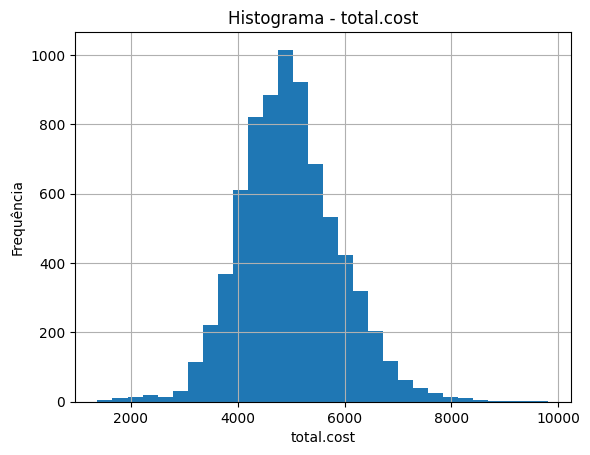

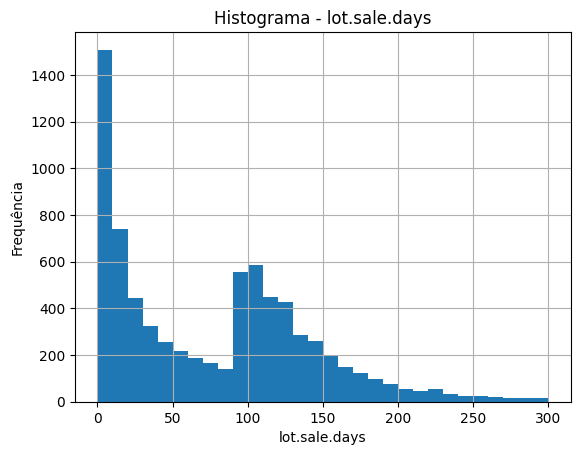

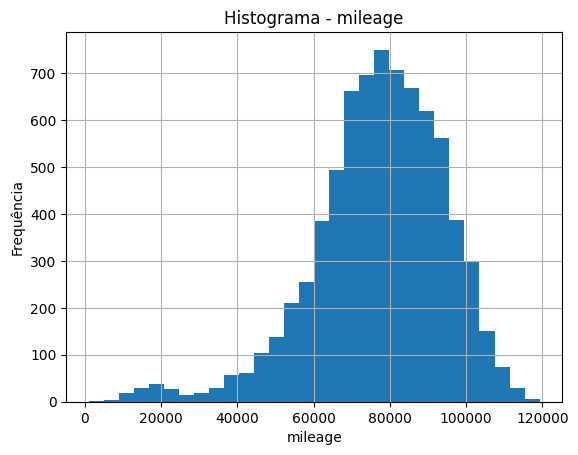

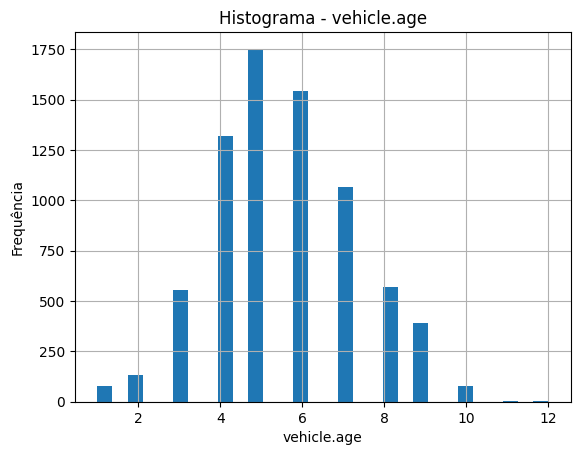

In [13]:
for coluna in colunas:
    df[coluna].hist(bins=30)
    plt.title(f'Histograma - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


#### Gráfico de Dispersão(ScatterPlot)

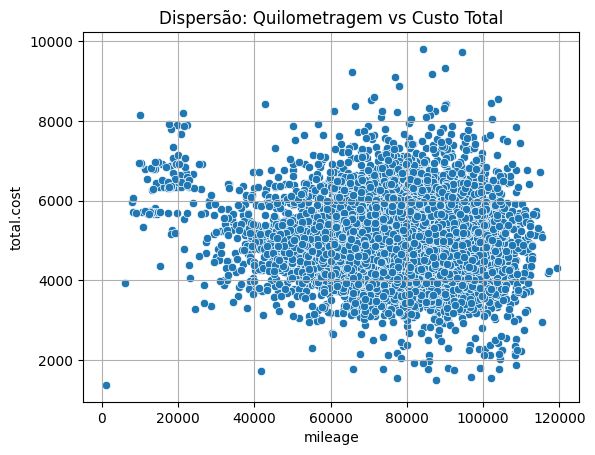

In [14]:
sns.scatterplot(x='mileage', y='total.cost', data=df)
plt.title('Dispersão: Quilometragem vs Custo Total')
plt.grid(True)
plt.show()


#### Boxplot


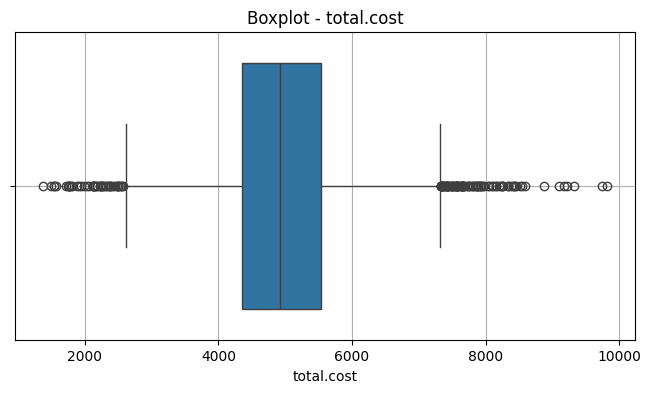

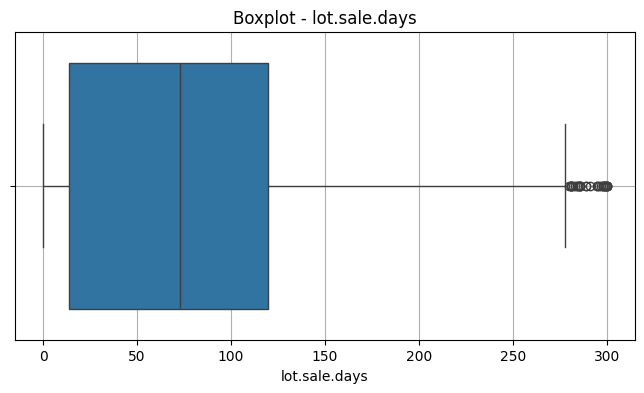

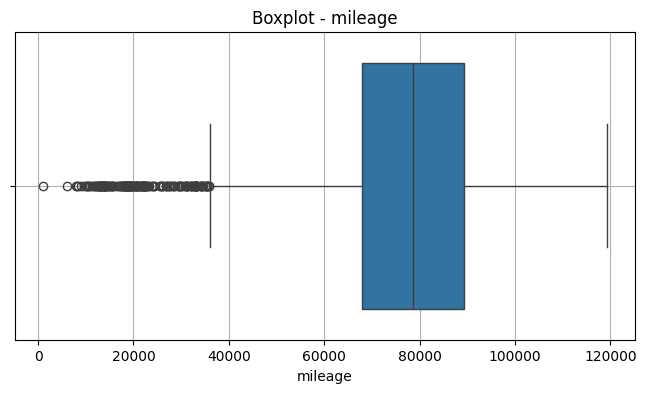

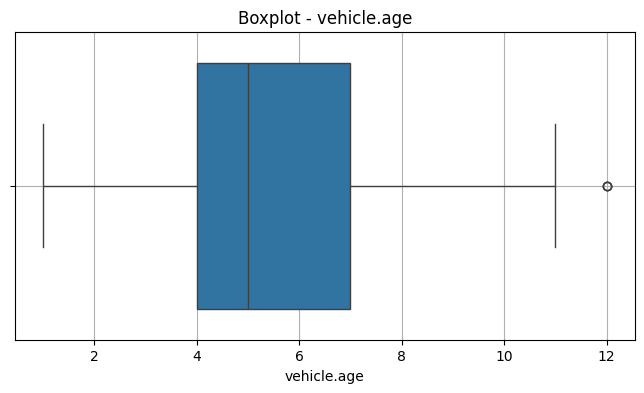

In [10]:
# Boxplots individuais para cada coluna
for coluna in colunas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[coluna])
    plt.title(f"Boxplot - {coluna}")
    plt.xlabel(coluna)
    plt.grid(True)
    plt.show()

### Matriz de Correlação


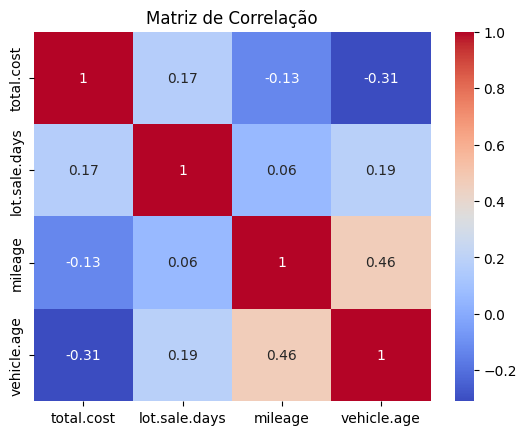

In [ ]:
# Gera um mapa de calor (heatmap) da matriz de correlação entre as variáveis numéricas selecionadas,
#  'annot=True' exibe os valores das correlações nas células,
# 'cmap="coolwarm"' define a paleta de cores para destacar correlações positivas e negativas.
sns.heatmap(df[colunas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


<div style = "text-align:center">

# Tarefa 
</div>



## 1. Vendas e Estoques



 ### Qual é o tempo médio em dias que os veículos passam no lote antes de serem vendidos (lot.sale.days)?

In [4]:
tempo_medio_venda = df['lot.sale.days'].mean()
print(f"\nTempo médio de venda: {tempo_medio_venda:.2f} dias")


Tempo médio de venda: 76.45 dias


Esse valor mostra quanto tempo, em média, um carro permanece no estoque antes de ser vendido.

###  Veículos de que tipo (vehicle.type) têm o menor tempo de venda?

In [ ]:
df.groupby('vehicle.type')['lot.sale.days'].mean().sort_values(ascending=True).head(10)


vehicle.type
LUXURY           61.976459
FAMILY.SMALL     73.287356
FAMILY.LARGE     74.015385
FAMILY.MEDIUM    80.699403
ECONOMY          85.266598
Name: lot.sale.days, dtype: float64

Esse agrupamento mostra a média de dias por tipo de veículo, permitindo ver quais são vendidos mais rápido. Tipos como ECONOMY ou FAMILY.MEDIUM geralmente têm maior rotatividade, enquanto LUXURY podem demorar mais a vender.

###  Como a quilometragem (mileage) influencia o tempo de venda (lot.sale.days)?

##### Correlaçã gráfica 

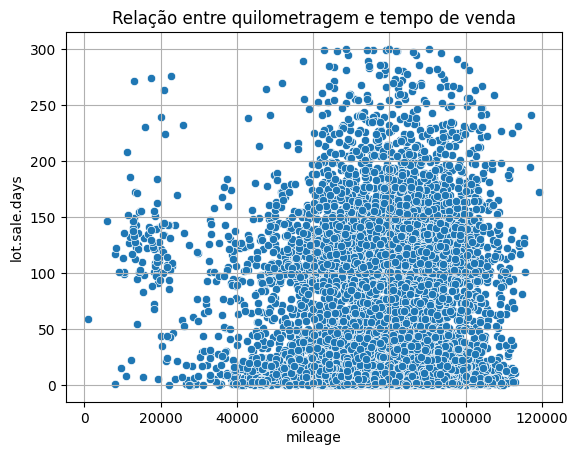

In [8]:
sns.scatterplot(x='mileage', y='lot.sale.days', data=df)
plt.title('Relação entre quilometragem e tempo de venda')
plt.grid(True)
plt.show()


##### Correlação numérica

In [9]:
correlacao = df[['mileage', 'lot.sale.days']].corr()
print(correlacao)


                mileage  lot.sale.days
mileage        1.000000       0.060003
lot.sale.days  0.060003       1.000000


A correlação numérica entre mileage e lot.sale.days é muito próxima de zero (~0.06), indicando que não há uma relação linear significativa entre a quilometragem do carro e o tempo que ele demora para ser vendido.

O gráfico de dispersão confirma essa conclusão: os pontos estão espalhados de forma aleatória, sem formar uma tendência clara (nem crescente, nem decrescente).

### Existe alguma correlação entre a idade do veículo (vehicle.age) e o custo total (total.cost)?

##### Correlação Gráfica

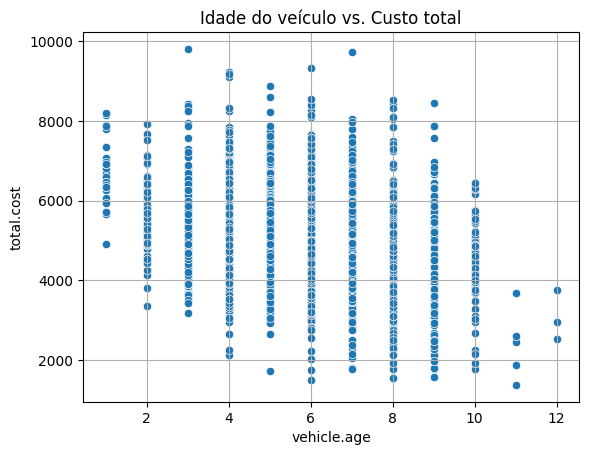

In [11]:
sns.scatterplot(x='vehicle.age', y='total.cost', data=df)
plt.title('Idade do veículo vs. Custo total')
plt.grid(True)
plt.show()


##### Correlação numérica

In [12]:
df[['vehicle.age', 'total.cost']].corr()


,vehicle.age,total.cost
vehicle.age,1.000000,-0.309716
total.cost,-0.309716,1.000000


Existe sim uma correlação entre a idade do veículo (vehicle.age) e o custo total (total.cost). A correlação é negativa e moderada (-0.31), indicando que veículos mais antigos tendem a custar menos. O gráfico de dispersão confirma essa tendência: quanto maior a idade, menor o preço.

### Observação:

Carros mais novos (1 a 3 anos) concentram preços mais altos (R$ 6.000 a R$ 9.000+).

Carros mais velhos (10 a 12 anos) estão, em geral, com preços mais baixos (abaixo de R$ 4.000).

O coeficiente de correlação entre vehicle.age e total.cost foi -0,31, o que indica:

    Uma correlação negativa: à medida que a idade do veículo aumenta, o preço tende a diminuir.

    Força moderada: não é uma relação perfeita (como -1), mas é estatisticamente significativa.

## 2. Preços e Custos

### Qual é o preço médio dos veículos vendidos, segmentado por estado (state)?

In [16]:
df.groupby('state')['total.cost'].mean().sort_values(ascending=False).head(10)

state
GA    5123.230874
NV    5092.811245
TX    5065.806061
CA    5064.960861
AZ    4931.399261
VA    4881.094903
FL    4821.242279
NM    4691.565022
Name: total.cost, dtype: float64

Os dados mostram que o preço médio dos veículos vendidos varia entre os estados, com destaque para:

Georgia (GA): maior média de preço (R$ 5.123)

Nevada (NV), Texas (TX) e Califórnia (CA) também com médias acima de R$ 5.000

Novo México (NM) apresenta o menor valor da lista (R$ 4.691)

### Veículos importados (domestic.import) são, em média, mais caros que os domésticos?

In [17]:
# Calcula o preço médio dos veículos por categoria (Importado vs Doméstico)
preco_medio_import = df.groupby('domestic.import')['total.cost'].mean()
print(preco_medio_import)

domestic.import
Domestic    4932.471854
Import      5088.144105
Name: total.cost, dtype: float64


Os veículos importados têm, em média, um preço mais alto do que os veículos domésticos:

Importados: R$ 5.088

Domésticos: R$ 4.932

### Existe alguma diferença significativa no total.cost entre cores (color.set)?


Custo médio total por cor:

color.set
BLACK     5140.317697
GOLD      5105.725291
GREEN     5064.397624
SILVER    4991.600555
PURPLE    4976.824969
WHITE     4919.996255
RED       4885.327362
BLUE      4864.032958
Name: total.cost, dtype: float64


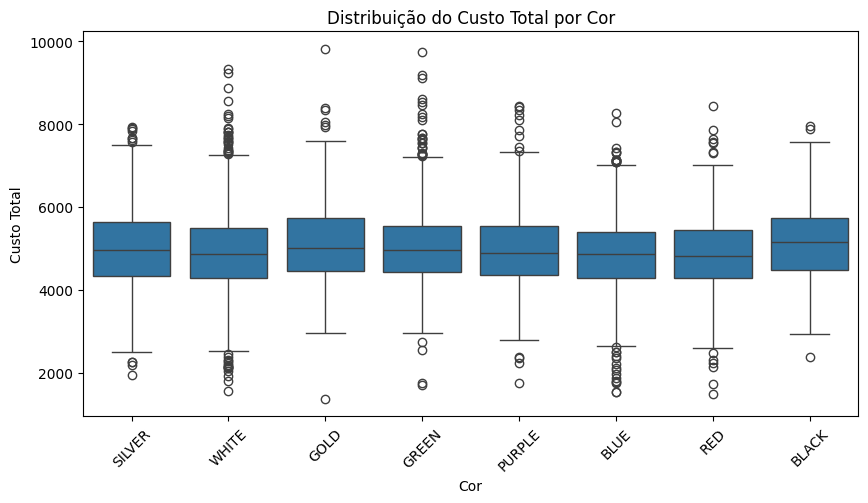

In [28]:
# Calcula o custo médio total por cor
print("\nCusto médio total por cor:\n")
media_por_cor = df.groupby('color.set')['total.cost'].mean().sort_values(ascending=False)
print(media_por_cor)

# Visualização com boxplot para comparar a distribuição dos custos por cor
plt.figure(figsize=(10, 5))
sns.boxplot(x='color.set', y='total.cost', data=df)
plt.title('Distribuição do Custo Total por Cor')
plt.xlabel('Cor')
plt.ylabel('Custo Total')
plt.xticks(rotation=45)
plt.show()



A análise mostra que há variações no custo médio por cor, mas essas diferenças não são muito grandes:

    Cores com maior preço médio: BLACK, GOLD e GREEN

    Cores com menor preço médio: BLUE, RED e WHITE

O boxplot reforça essa conclusão:

    A mediana dos preços é parecida entre as cores.

    A distribuição e presença de outliers são semelhantes, indicando que a cor não é um fator determinante no custo total.

###  Como o total.cost varia por vehicle.age.group e vehicle.type?

In [35]:
# Agrupamento duplo (média de preço por grupo de idade e tipo)
df.groupby(['vehicle.age.group', 'vehicle.type'])['total.cost'].mean().unstack()


vehicle.type,ECONOMY,FAMILY.LARGE,FAMILY.MEDIUM,FAMILY.SMALL,LUXURY
vehicle.age.group,,,,,
FIVE,4783.896266,5288.790698,5058.116466,5010.970109,5428.604520
FOUR,4770.440141,5435.982143,5263.133621,5065.265101,5468.047170
ONE-THREE,5047.341176,5719.028986,5744.308605,5363.056180,5986.500000
SEVEN+,3912.953846,4754.028958,4534.567201,4408.502392,5000.040268
SIX,4449.676259,5165.222642,4914.842748,4744.063492,5230.450644


##### Ánalise visual

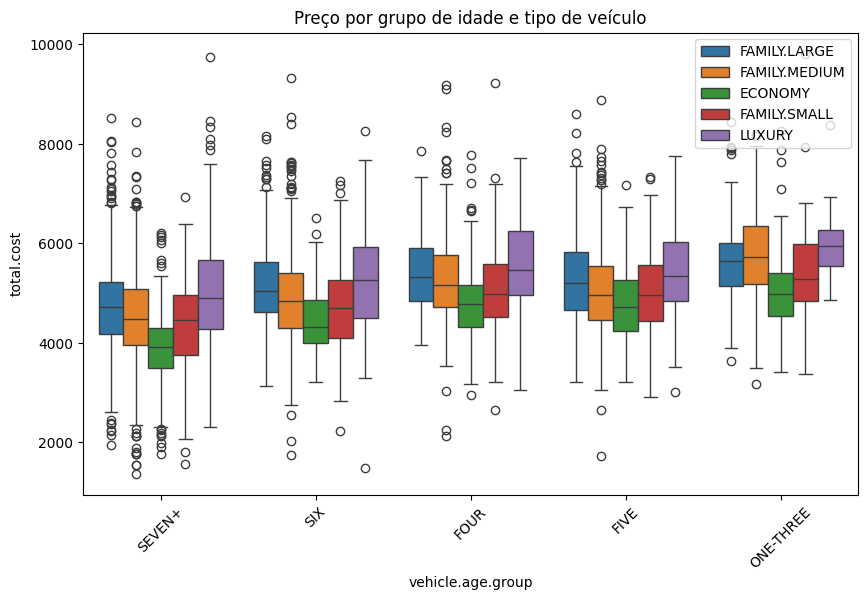

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle.age.group', y='total.cost', hue='vehicle.type', data=df)
plt.title('Preço por grupo de idade e tipo de veículo')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


A análise revela que:

Veículos mais novos (ONE-THREE) possuem os maiores preços médios, especialmente os do tipo LUXURY, FAMILY.LARGE e FAMILY.MEDIUM.

Veículos mais antigos (SEVEN+) apresentam os menores preços médios, como esperado pela depreciação.

Entre os tipos, os veículos LUXURY são consistentemente os mais caros em todos os grupos de idade.

Os veículos ECONOMY e FAMILY.SMALL têm os menores preços médios em praticamente todas as faixas de idade.


# 3.Tendências por Categoria

### Quaais marcas (makex) e modelos (make.model) são mais vendidas em cada estado?

In [42]:
# Marcas mais vendidas por estado
mais_vendidas_por_estado = df.groupby(['state', 'makex']).size().reset_index(name = 'quantidade')
mais_vendidas_por_estado = mais_vendidas_por_estado.sort_values(['state', 'quantidade'], ascending=[True, False])
mais_vendidas_por_estado.groupby('state').head(1)

#Modelos mais vendidps por estado

mais_modelos_por_estado = df.groupby(['state', 'make.model']).size().reset_index(name = 'quantidade')
mais_modelos_por_estado = mais_modelos_por_estado.sort_values(['state', 'quantidade'], ascending=[True, False])
mais_modelos_por_estado.groupby('state').head(1)


,state,make.model,quantidade
13,AZ,CHEVROLET.LUMINA,66
130,CA,NISSAN.SENTRA,138
201,FL,NISSAN.SENTRA,103
232,GA,CHEVROLET.LUMINA,68
294,NM,CHEVROLET.CORSICA,11
371,NV,KIA.SEPHIA,15
427,TX,FORD.TAURUS,111
506,VA,FORD.TAURUS,40


 A análise mostra que os modelos mais vendidos variam significativamente entre os estados, indicando diferenças regionais nas preferências do consumidor:

NISSAN.SENTRA lidera as vendas na Califórnia (CA) e Flórida (FL).

CHEVROLET.LUMINA é o mais vendido no Arizona (AZ) e na Geórgia (GA).

FORD.TAURUS se destaca no Texas (TX) e na Virgínia (VA).

Modelos como CHEVROLET.CORSICA e KIA.SEPHIA aparecem em estados com menor volume de vendas.

###  Quais faizas estária do veículos (vehicle.age.group) são mais comuns?

In [43]:
df['vehicle.age.group'].value_counts().sort_values(ascending=False)

vehicle.age.group
SEVEN+       2115
FIVE         1748
SIX          1544
FOUR         1320
ONE-THREE     768
Name: count, dtype: int64

##### Ànalise visual

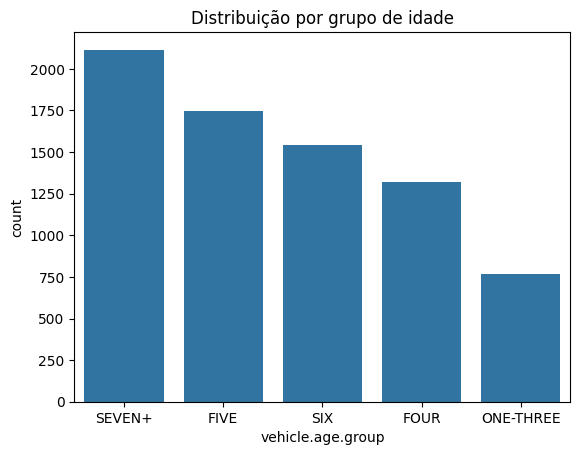

In [44]:
sns.countplot(x='vehicle.age.group', data=df, order=df['vehicle.age.group'].value_counts().index)
plt.title('Distribuição por grupo de idade')
plt.show()

A análise mostra que a maioria dos veículos vendidos pertence ao grupo SEVEN+, ou seja, com mais de 7 anos de uso, seguido pelos grupos FIVE, SIX e FOUR.

## 4.Impacto de Características no Desempenho

#### Como a quilometragem (mileage) afeta o total.cost dos veículos, considerando diferentes tipos de veículo (vehicle.type)?

In [48]:
tipos = df['vehicle.type'].unique()

for tipo in tipos:
    subset = df[df['vehicle.type'] == tipo]
    correlacao = subset[['mileage', 'total.cost']].corr().iloc[0,1]
    print(f"{tipo}: Correlação = {correlacao:.3f}")


FAMILY.LARGE: Correlação = -0.184
FAMILY.MEDIUM: Correlação = -0.257
ECONOMY: Correlação = -0.168
FAMILY.SMALL: Correlação = -0.053
LUXURY: Correlação = -0.043


Todos os tipos de veículos apresentam correlação negativa, ou seja, quanto maior a quilometragem, menor tende a ser o custo total.

| Tipo de Veículo | Correlação | Interpretação                                                                                                |
| --------------- | ---------- | ------------------------------------------------------------------------------------------------------------ |
| FAMILY.MEDIUM   | -0.257     | A quilometragem tem influência moderada no custo. É o tipo com maior impacto da quilometragem sobre o custo. |
| FAMILY.LARGE    | -0.184     | A relação é um pouco mais fraca, mas ainda perceptível. Veículos maiores tendem a perder valor com o uso.    |
| ECONOMY         | -0.168     | Influência moderada, o custo diminui com maior quilometragem.                                                |
| FAMILY.SMALL    | -0.053     | Correlação fraca: a quilometragem afeta pouco o custo.                                                       |
| LUXURY          | -0.043     | Quase nenhuma correlação: mesmo com uso elevado, os veículos de luxo mantêm preços relativamente altos.      |


##### Análise visual

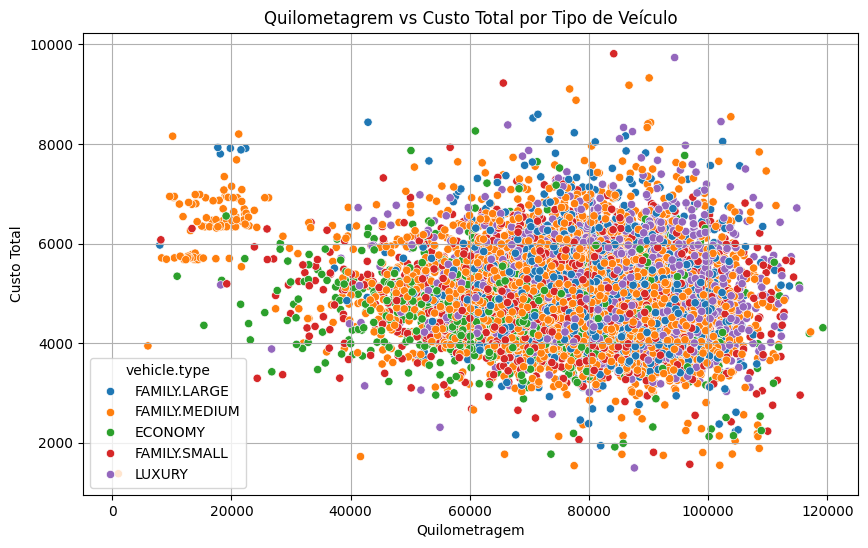

In [47]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='mileage', y='total.cost', hue='vehicle.type', data=df)
plt.title('Quilometagrem vs Custo Total por Tipo de Veículo')
plt.xlabel('Quilometragem')
plt.ylabel('Custo Total')
plt.grid(True)
plt.show()


Existe uma tendência de redução no custo total conforme a quilometragem aumenta, especialmente visível em veículos do tipo ECONOMY e FAMILY.MEDIUM. No entanto, veículos do tipo LUXURY mantêm valores mais altos mesmo com quilometragem elevada, sugerindo que o tipo do veículo influencia como a quilometragem afeta o custo.

#### Quais características mais influenciam o custo total?

##### Por idade

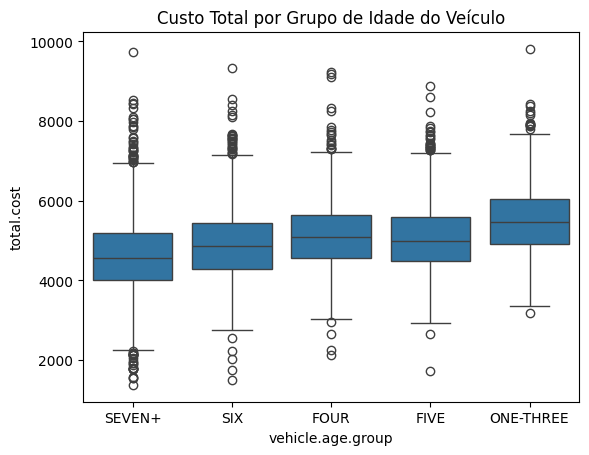

In [49]:
sns.boxplot(x='vehicle.age.group', y='total.cost', data=df)
plt.title('Custo Total por Grupo de Idade do Veículo')
plt.show()

##### Por tipo de Veículo

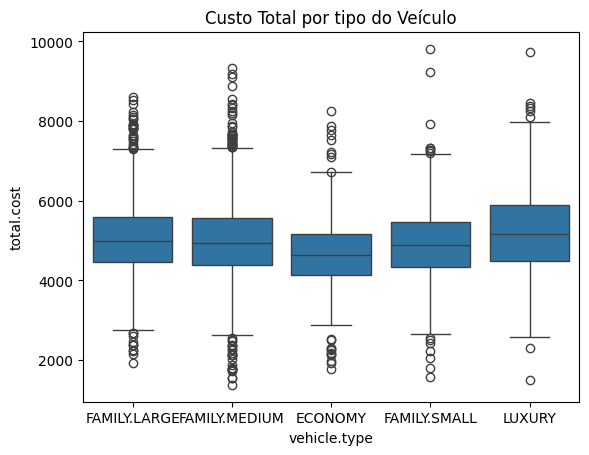

In [50]:
sns.boxplot(x='vehicle.type', y='total.cost', data=df)
plt.title('Custo Total por tipo do Veículo')
plt.show()

##### Por Origem (Doméstico/Importado)

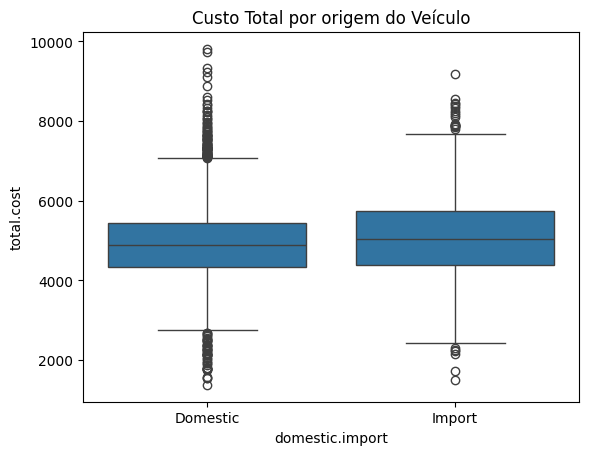

In [52]:
sns.boxplot(x='domestic.import', y='total.cost', data=df)
plt.title('Custo Total por origem do Veículo')
plt.show()

In [ ]:
df[['mileage', 'vehicle.age', 'total.cost']].corr()

,mileage,vehicle.age,total.cost
mileage,1.000000,0.462838,-0.127258
vehicle.age,0.462838,1.000000,-0.309716
total.cost,-0.127258,-0.309716,1.000000


# 5. Identificação de Outliers e Anomalias

#### Existem Veículos que ficaram muito tempo no lote do que a média? Quais são suas caracteríscias?

In [67]:
#Definição de outliers: 
média = df['lot.sale.days'].mean()
print(f"\nMédia de tempo de venda: {média:.2f} dias")

#Cálculo dos quartis e IQR para identificar outliers
Q1 = df['lot.sale.days'].quantile(0.25)
Q3 = df['lot.sale.days'].quantile(0.75)
IQR = Q3 - Q1

#Define outliers como veícukos com tempo de venda acima do norma
limite_superior = Q3 + 1.5 * IQR
outliers = df[df['lot.sale.days'] > limite_superior]

#Mostra alguns do outliers com suas principais características
print("\nQuantidade de outliers identificados:", len(outliers))

print("\nOutliers com características relevantes:")

outliers[['makex', 'make.model', 'lot.sale.days', 'vehicle.type', 'mileage', 'state', 'total.cost']].sort_values(by='lot.sale.days', ascending=False).head(15)




Média de tempo de venda: 76.45 dias

Quantidade de outliers identificados: 33

Outliers com características relevantes:


,makex,make.model,lot.sale.days,vehicle.type,mileage,state,total.cost
403,BUICK,BUICK.SKYLARK,300,FAMILY.SMALL,79785,GA,5786
2705,CHEVROLET,CHEVROLET.CORSICA,300,ECONOMY,90429,VA,4607
1840,MERCURY,MERCURY.TRACER,300,ECONOMY,68674,TX,5554
2366,OLDSMOBILE,OLDSMOBILE.CUTLASS SUPREME,300,FAMILY.LARGE,80026,CA,6822
2423,FORD,FORD.ESCORT,299,FAMILY.SMALL,62979,AZ,5069
1543,OLDSMOBILE,OLDSMOBILE.CIERA,299,FAMILY.MEDIUM,79048,GA,4835
3261,MERCURY,MERCURY.TRACER,299,ECONOMY,74220,NM,4169
1168,CHEVROLET,CHEVROLET.CAVALIER,299,ECONOMY,75678,NM,4555
3300,CHEVROLET,CHEVROLET.LUMINA,298,FAMILY.MEDIUM,81831,FL,6244
2455,DODGE,DODGE.NEON,298,ECONOMY,81976,FL,5665


Foram identificados veículos com tempo de permanência no lote significativamente acima da média (mais de 298 dias). Esses outliers pertencem a marcas como Chevrolet, Oldsmobile, Mercury e Ford, com modelos econômicos ou familiares antigos e alta quilometragem.

#### Algum estado ou marca apresenta veículos com preços significativamente fora da média?

In [88]:
# Preço médio geral
media_geral = df['total.cost'].mean()
print(f"Preço médio geral dos veículos: {media_geral:.2f}")

# Limites de outliers
Q1_cost = df['total.cost'].quantile(0.25) 
Q3_cost = df['total.cost'].quantile(0.75)
IQR_cost = Q3_cost - Q1_cost 

limite_superior_cost = Q3_cost + 1.5 * IQR_cost
limite_inferior_cost = Q1_cost - 1.5 * IQR_cost

# Outliers de preço
outliers_preco = df[(df['total.cost'] < limite_inferior_cost) | (df['total.cost'] > limite_superior_cost)]

# Verificação de estados e marcas
print("\nEstados com mais outliers de preço:")
print(outliers_preco['state'].value_counts().head())



Preço médio geral dos veículos: 4980.04

Estados com mais outliers de preço:
state
TX    35
CA    29
VA    28
AZ    21
FL    16
Name: count, dtype: int64


In [ ]:
print("\nMarcas com mais outliers de preço:")
print(outliers_preco['makex'].value_counts().head())



Marcas com mais outliers de preço:
makex
FORD          21
BUICK         19
CHEVROLET     17
OLDSMOBILE    14
PONTIAC       10
Name: count, dtype: int64


In [90]:
# Exibir alguns outliers de preço
print("\nAlguns veículos com preço fora da média (outliers):")
print(outliers_preco[['makex', 'make.model', 'total.cost', 'state', 'vehicle.type']].sort_values(by='total.cost', ascending=False).head(10))

print("\nAlguns veículos com preço abaixo da média (outliers inferiores):")
print(outliers_preco[['makex', 'make.model', 'total.cost', 'state', 'vehicle.type']].sort_values(by='total.cost').head(10))



Alguns veículos com preço fora da média (outliers):
           makex          make.model  total.cost state   vehicle.type
667         FORD        FORD.CONTOUR        9813    TX   FAMILY.SMALL
966      PONTIAC  PONTIAC.BONNEVILLE        9736    TX         LUXURY
2386       BUICK         BUICK.REGAL        9327    NV  FAMILY.MEDIUM
790      PONTIAC    PONTIAC.GRAND AM        9224    TX   FAMILY.SMALL
2193       MAZDA           MAZDA.626        9181    TX  FAMILY.MEDIUM
838   OLDSMOBILE  OLDSMOBILE.CUTLASS        9105    VA  FAMILY.MEDIUM
1907   CHEVROLET    CHEVROLET.MALIBU        8879    VA  FAMILY.MEDIUM
2441  OLDSMOBILE       OLDSMOBILE.88        8596    TX   FAMILY.LARGE
6994       MAZDA      MAZDA.MILLENIA        8547    TX  FAMILY.MEDIUM
1417       BUICK       BUICK.LESABRE        8522    TX   FAMILY.LARGE

Alguns veículos com preço abaixo da média (outliers inferiores):
          makex         make.model  total.cost state   vehicle.type
6708    MERCURY      MERCURY.TOPAZ        1

# 6. Estratégias de Marketing e Logística

#### Qual é a cor mais popular (color.set) entre os veículos vendidos?


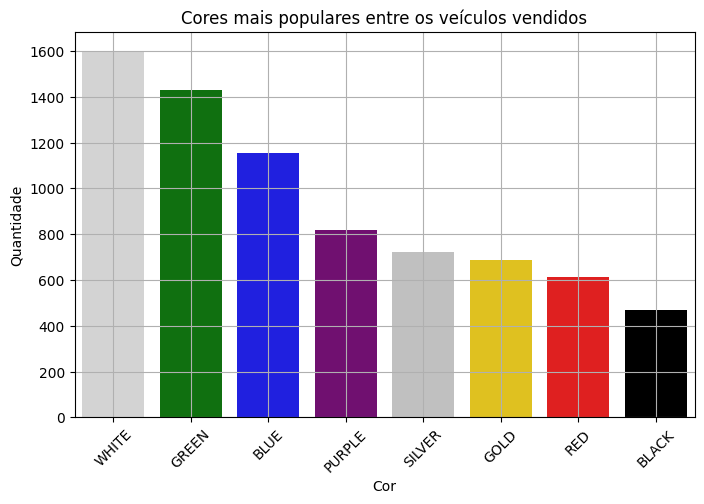

In [ ]:
plt.figure(figsize=(8, 5))

# Criando uma nova coluna temporária para usar como hue
df['color.temp'] = df['color.set']  

# Paleta de cores personalizada
palette = {cor: cor_map.get(cor, 'gray') for cor in cores_populares.index}

sns.countplot(data=df, x='color.set', hue='color.temp', order=cores_populares.index,
              palette=palette, legend=False)

plt.title('Cores mais populares entre os veículos vendidos')
plt.xlabel('Cor')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Remover a coluna temporária se quiser
df.drop(columns='color.temp', inplace=True)


# Veículos de quais marcas ou modelos têm melhor desempenho em cada estado?

##### Mais vendidos por estado (por marca e modelo)

In [103]:
# Marca mais vendida por estado
mais_vendidas_por_estado = df.groupby(['state', 'makex']).size().reset_index(name='quantidade')
mais_vendidas_por_estado = mais_vendidas_por_estado.sort_values(['state', 'quantidade'], ascending=[True, False])
top_marcas_estado = mais_vendidas_por_estado.groupby('state').head(1)
print("Marca mais vendida por estado:")
display(top_marcas_estado)

# Modelo mais vendido por estado
mais_modelos_por_estado = df.groupby(['state', 'make.model']).size().reset_index(name='quantidade')
mais_modelos_por_estado = mais_modelos_por_estado.sort_values(['state', 'quantidade'], ascending=[True, False])
top_modelos_estado = mais_modelos_por_estado.groupby('state').head(1)
print("Modelo mais vendido por estado:")
display(top_modelos_estado)


Marca mais vendida por estado:


,state,makex,quantidade
2,AZ,CHEVROLET,143
34,CA,NISSAN,211
40,FL,BUICK,201
60,GA,BUICK,132
81,NM,CHEVROLET,29
112,NV,OLDSMOBILE,31
123,TX,FORD,250
143,VA,FORD,99


Modelo mais vendido por estado:


,state,make.model,quantidade
13,AZ,CHEVROLET.LUMINA,66
130,CA,NISSAN.SENTRA,138
201,FL,NISSAN.SENTRA,103
232,GA,CHEVROLET.LUMINA,68
294,NM,CHEVROLET.CORSICA,11
371,NV,KIA.SEPHIA,15
427,TX,FORD.TAURUS,111
506,VA,FORD.TAURUS,40
